In [1]:
import pandas as pd
import dglib

In [2]:
numWeeks = 16
tournamentData = dglib.get_tournament_data()
teamData = dglib.get_team_data(tournamentData, numWeeks)  # NOTE: If player didn't play they won't be included in this DF

### Player Season Point Totals

In [3]:
seasonTotals = tournamentData[['name', 'fantasyPoints', 'rawPoints']].groupby('name', as_index=False).sum()
seasonTotals = seasonTotals.sort_values('fantasyPoints', ascending=False).iloc[0:50]
seasonTotals['points'] = seasonTotals['fantasyPoints']
seasonTotals[['name', 'points']]

,name,points
174,Calvin Heimburg,48
277,Isaac Robinson,29
249,Gannon Buhr,27
205,Corey Ellis,24
228,Eagle McMahon,22
357,Kyle Klein,21
477,Richard Wysocki,19
198,Cole Redalen,17
296,James Proctor,16
110,Adam Hammes,13


### Team Point Totals

<AxesSubplot:title={'center':'Weekly Point Totals'}, xlabel='week', ylabel='Total Points'>

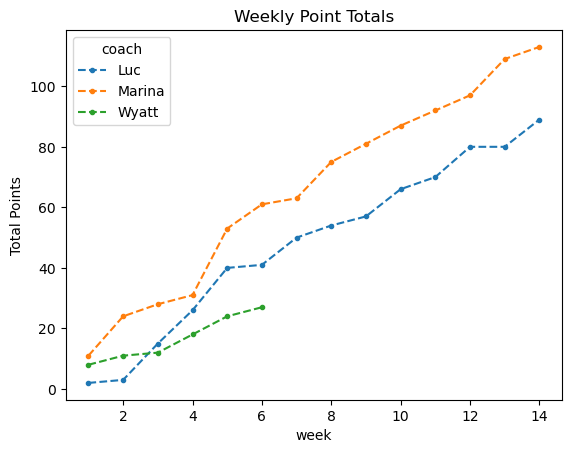

In [4]:
df = teamData[teamData.status == 'start']
weekly = df[['week', 'coach', 'fantasyPoints']].groupby(by=['week', 'coach'], as_index=False).sum()
weekly = weekly.pivot(index="week", columns="coach", values="fantasyPoints")
weekly.cumsum().plot(title="Weekly Point Totals", ylabel="Total Points", style='--.')

### Average Finishing Place

<AxesSubplot:title={'center':'Average Starter Finishing Place'}, xlabel='week', ylabel='Finishing Place'>

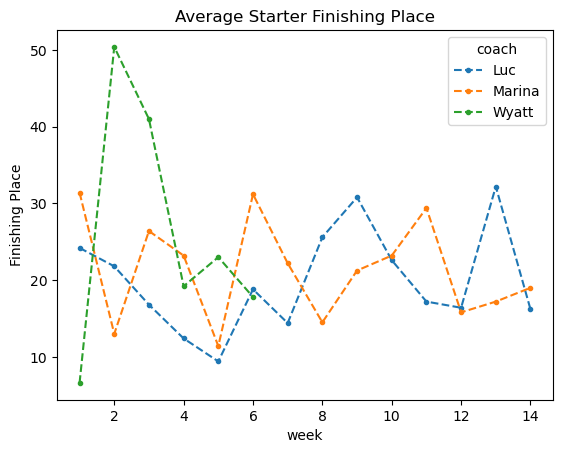

In [5]:
df = teamData[teamData.status == 'start']
weekly = df[['week', 'coach', 'place']].groupby(by=['week', 'coach'], as_index=False).mean()
weekly = weekly.pivot(index="week", columns="coach", values="place")
weekly.plot(title='Average Starter Finishing Place', ylabel='Finishing Place', style='--.')

<AxesSubplot:title={'center':'Average Full Team Finishing Place'}, xlabel='week', ylabel='Finishing Place'>

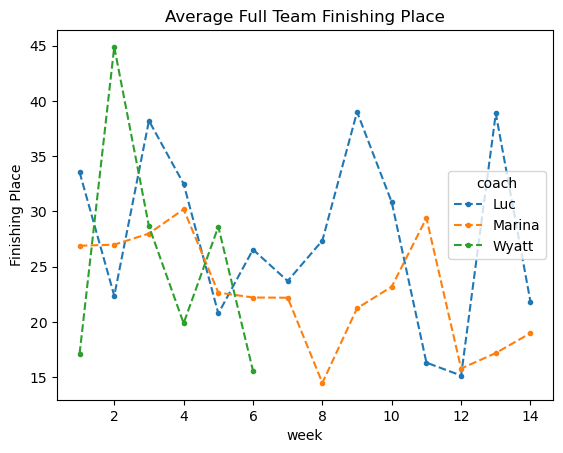

In [6]:
weekly = teamData[['week', 'coach', 'place']].groupby(by=['week', 'coach'], as_index=False).mean()
weekly = weekly.pivot(index="week", columns="coach", values="place")
weekly.plot(title='Average Full Team Finishing Place', ylabel='Finishing Place', style='--.')

In [7]:
df = teamData[teamData.status == 'start']
season = df[['coach', 'place']].groupby(by=['coach'], as_index=False).mean()
print("Season Average Finishing Place of Starters")
season

Season Average Finishing Place of Starters


,coach,place
0,Luc,19.914286
1,Marina,21.470588
2,Wyatt,26.333333


In [8]:
season = teamData[['coach', 'place']].groupby(by=['coach'], as_index=False).mean()
print("Season Average Finishing Place of Full Team")
season

Season Average Finishing Place of Full Team


,coach,place
0,Luc,28.130841
1,Marina,23.979167
2,Wyatt,25.346154


### Bench Points

<AxesSubplot:title={'center':'Bench Points'}, xlabel='week', ylabel='Total Points'>

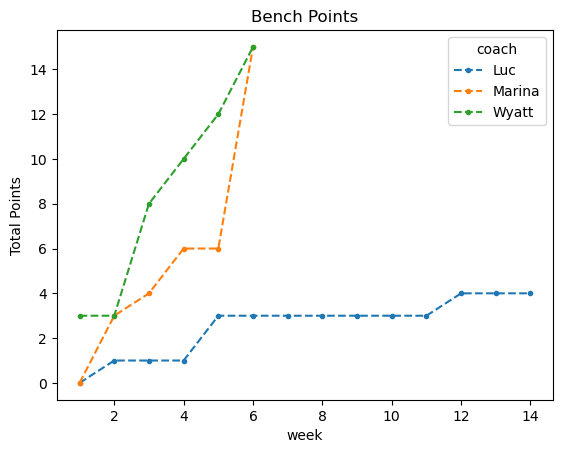

In [9]:
df = teamData[teamData.status == 'bench']
weekly = df[['week', 'coach', 'fantasyPoints']].groupby(by=['week', 'coach'], as_index=False).sum()
weekly = weekly.pivot(index="week", columns="coach", values="fantasyPoints")
weekly.cumsum().plot(title="Bench Points", ylabel="Total Points", style='--.')

### Average Rating

In [10]:
df = teamData[teamData.status == 'start']
season = df[['coach', 'rating']].groupby(by=['coach'], as_index=False).mean()
print("Season Average Rating of Starters")
season

Season Average Rating of Starters


,coach,rating
0,Luc,1036.885714
1,Marina,1035.323529
2,Wyatt,1037.000000


In [11]:
season = teamData[['coach', 'rating']].groupby(by=['coach'], as_index=False).mean()
print("Season Average Rating of Full Team")
season

Season Average Rating of Full Team


,coach,rating
0,Luc,1032.476636
1,Marina,1034.062500
2,Wyatt,1034.211538


<AxesSubplot:title={'center':'Average Starter Rating'}, xlabel='week', ylabel='Finishing Place'>

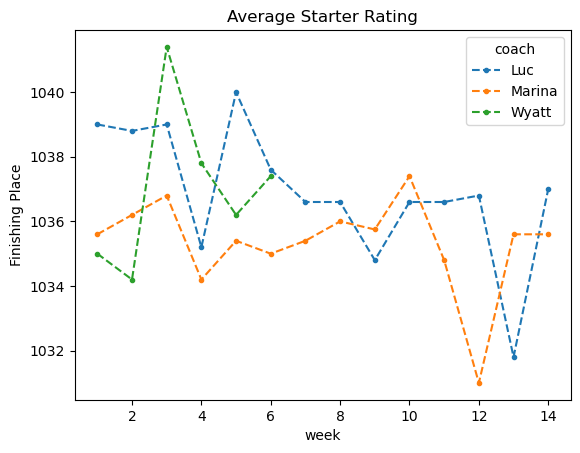

In [12]:
df = teamData[teamData.status == 'start']
weekly = df[['week', 'coach', 'rating']].groupby(by=['week', 'coach'], as_index=False).mean()
weekly = weekly.pivot(index="week", columns="coach", values="rating")
weekly.plot(title='Average Starter Rating', ylabel='Finishing Place', style='--.')

<AxesSubplot:title={'center':'Weekly Point Totals'}, xlabel='week', ylabel='Total Points'>

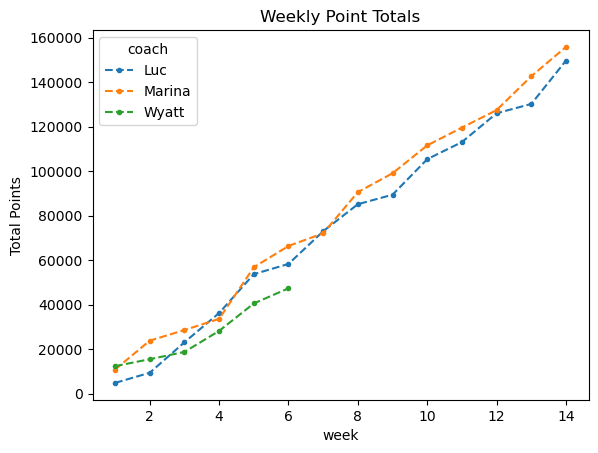

In [4]:
df = teamData[teamData.status == 'start']
weekly = df[['week', 'coach', 'cash']].groupby(by=['week', 'coach'], as_index=False).sum()
weekly = weekly.pivot(index="week", columns="coach", values="cash")
weekly.cumsum().plot(title="Weekly Point Totals", ylabel="Total Points", style='--.')

In [7]:
df = teamData[teamData.status == 'start']
season = df[['coach', 'cash']].groupby(by=['coach'], as_index=False).sum()
print("Cash Totals")
season.sort_values('cash', ascending=False)

Cash Totals


,coach,cash
1,Marina,155892.0
0,Luc,149726.0
2,Wyatt,47363.0


In [9]:
df = teamData[teamData.status == 'start']
season = df[['coach', 'fantasyPoints']].groupby(by=['coach'], as_index=False).sum()
print("Point Totals")
season.sort_values('fantasyPoints', ascending=False)

Point Totals


,coach,fantasyPoints
1,Marina,113
0,Luc,89
2,Wyatt,27
